# Heap Sort

- n개의 노드에 대한 완전 이진 트리를 구성한다. 이때 루트 노드부터 부모노드, 왼쪽 자식노드, 오른쪽 자식노드 순으로 구성한다.


- **최대 힙(MAX Heap)**을 구성한다.

최대 힙이란 부모노드가 자식노드보다 큰 트리를 말하는데, 단말 노드를 자식노드로 가진 부모노드부터 구성하며 아래부터 루트까지 올라오며 순차적으로 만들어 갈 수 있다.


- 가장 큰 수(루트에 위치)를 가장 작은 수와 교환한다.


- 두번째 과정과 세번째 과정을 반복한다.


힙 정렬은 일반적인 경우 ${\displaystyle O(n\log n)}$의 시간복잡도를 가진다.

## Src - Heap_Sort

In [1]:
# Heap Sort in python

def heapify(lst, n, i):

    # Find largest among root and children
    
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
  
    if l < n and lst[i] < lst[l]:
        largest = l
  
    if r < n and lst[largest] < lst[r]:
        largest = r
  
    # If root is not largest, swap with largest and continue heapifying
    if largest != i:
        lst[i], lst[largest] = lst[largest], lst[i]
        heapify(lst, n, largest)
  
  
def heap_sort(lst):
    
    n = len(lst)
    
    # Build max heap
    for i in range(n//2, -1, -1):
        heapify(lst, n, i)
  

    for i in range(n-1, 0, -1):
        
        lst[i], lst[0] = lst[0], lst[i] # SWAP
        
        heapify(lst, i, 0)    # Heapify root element


In [2]:
data = [5, 4, 3, 2, 1]
heap_sort(data)
print(data)

[1, 2, 3, 4, 5]


## Create dataset

In [3]:
import random
    
def create_input_data(lst):
    
    data_asc = sorted(lst).copy()
    
    random.shuffle(lst)
    rdm_data = lst
    
    data_desc = sorted(lst,reverse = True).copy()


    return data_asc, rdm_data, data_desc

data = []

for i in range(5,20 + 1):
    data.append(2**i)

# list를 value로 가지는 Tuple
data = create_input_data(data)

In [4]:
for i in range(3):
    print("data {0} : {1}".format(i,data[i]),end = '\n\n')

data 0 : [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]

data 1 : [65536, 131072, 2048, 64, 512, 32768, 524288, 1048576, 128, 256, 16384, 4096, 262144, 8192, 1024, 32]

data 2 : [1048576, 524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64, 32]



## 수행시간 측정

In [5]:
import time

start_time0 = time.time() # 수행시간 측정
heap_sort(data[0])
end_time0 = time.time() # 측정 종료


start_time1 = time.time() # 수행시간 측정
heap_sort(data[1])
end_time1 = time.time() # 측정 종료


start_time2 = time.time() # 수행시간 측정
heap_sort(data[2])
end_time2 = time.time() # 측정 종료


print("정렬된 데이터 :", end_time0 - start_time0) # 수행 시간 출력

print("랜덤 정렬된 데이터 :", end_time1 - start_time1) # 수행 시간 출력

print("역정렬된 데이터 :", end_time2 - start_time2) # 수행 시간 출력


process_time_asc = end_time0 - start_time0

process_time_rdm = end_time1 - start_time1

process_time_desc = end_time2 - start_time2



정렬된 데이터 : 0.00011420249938964844
랜덤 정렬된 데이터 : 9.512901306152344e-05
역정렬된 데이터 : 8.606910705566406e-05


## Ploting

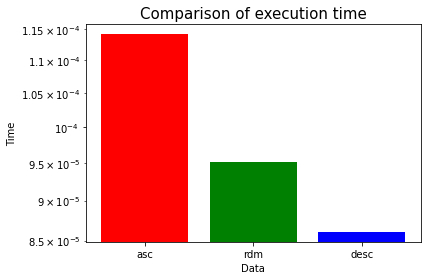

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(3)


values = [process_time_asc,process_time_rdm, process_time_desc]

plt.bar(x, values,color = ['r', 'g', 'b'])

xticks = ['asc', 'rdm', 'desc']

plt.xticks(x, xticks)

plt.xlabel('Data')
plt.ylabel('Time')

plt.yscale('log')

plt.title('Comparison of execution time', fontsize=15)

plt.show()

## result

- **역 정렬 데이터, 랜덤 정렬된 데이터, 정렬된 데이터 순으로 빠르게 정렬 되었습니다.**



## Heap Sort Applications

- Systems concerned with security and embedded systems such as Linux Kernel use Heap Sort because of the $O(n log n)$ upper bound on Heapsort's running time and constant $O(1)$ upper bound on its auxiliary storage.


- Although Heap Sort has $O(n log n)$ time complexity even for the worst case, it doesn't have more applications ( compared to other sorting algorithms like Quick Sort, Merge Sort ). 


- However, its underlying data structure, heap, can be efficiently used if we want to extract the smallest (or largest) from the list of items without the overhead of keeping the remaining items in the sorted order. For e.g Priority Queues.